In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

# Example 2: What if data is not linearly separable?

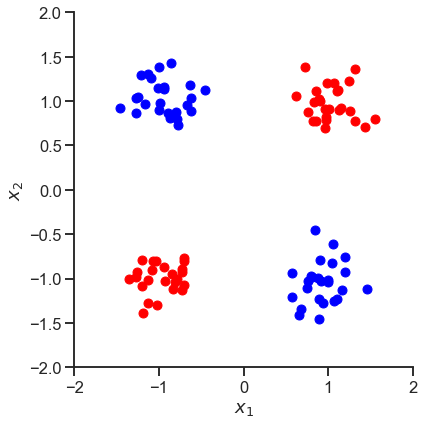

In [2]:
np.random.seed(4128)

n_samples = 50

X1 = []
X2 = []
for sample in range(n_samples):
    # class 1
    if np.random.uniform(0,1,1) > 0.5:
        X1.append(np.array([np.random.normal(-1,0.2,1), np.random.normal(1,0.2,1)]).reshape(1,-1))
    else:
        X1.append(np.array([np.random.normal(1,0.2,1), np.random.normal(-1,0.2,1)]).reshape(1,-1))
    # class 2  
    if np.random.uniform(0,1,1) > 0.5:
        X2.append(np.array([np.random.normal(-1,0.2,1), np.random.normal(-1,0.2,1)]).reshape(1,-1))
    else:
        X2.append(np.array([np.random.normal(1,0.2,1), np.random.normal(1,0.2,1)]).reshape(1,-1))

X = np.concatenate([np.concatenate(X1), np.concatenate(X2)])
y = np.zeros((X.shape[0],1))
y[n_samples:] = 1
y = y.astype(np.int)

# plot the training data
fig, ax = plt.subplots(figsize=(6,6))
for i in range(y.shape[0]):
    if y[i] == 0:
        marker = 'bo'
    else:
        marker = 'ro'
    ax.plot(X[i][0], X[i][1], marker)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
despine(ax=ax)

fig.tight_layout()
fig.savefig('figures/Figure-1-0_Not-Linaerly-Separable.png', dpi=600)

# XOR with multiple perceptrons

In [3]:
class Perceptron:
    
    def __init__(self, n_in, seed=1, b=None):
        self.w = np.random.uniform(-1,1,n_in)
        if b is None:
            np.random.seed(seed)
            self.b = np.random.uniform(-1,1,1)
            self.fit_b = True
        else:
            self.b = b
            self.fit_b = False
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
        
    def predict(self, x):
        Z = np.dot(x, self.w) + self.b
        self.A = self.sigmoid(Z)
        return self.A
    
    def loss(self, x, y, zerotol=1e-10):
        # cross entropy loss
        loss = -(y * np.log(self.predict(x) + zerotol) + (1 - y) * np.log(1 - self.predict(x) + zerotol))
        return loss
    
    def derivative_loss(self, x, y):
        # derivative of cross entropy loss wrt w (dL/dw)
        return self.predict(x) - y
    
    def update_weights(self, x, y, learning_rate):
        # dL / dw
        dZ = self.derivative_loss(x, y)
        # Subtract average derivative from weights
        self.w -= learning_rate * 1.0/dZ.shape[0] * np.dot(dZ, x)
        # .. and bias
        if self.fit_b:
            self.b -= learning_rate * 1.0/dZ.shape[0] * np.sum(dZ)
            
    def train(self, x, y, n_steps=10000, batch_size=16, learning_rate=1, verbose=False):
        self.training_loss = np.zeros(n_steps)
        iterator = range(n_steps)
        for step in (tqdm(iterator) if verbose else iterator):
            batch_idx = np.random.choice(X.shape[0], batch_size, replace=False)
            self.training_loss[step] = np.mean(self.loss(X[batch_idx], y[batch_idx]))
            self.update_weights(X[batch_idx], y[batch_idx], learning_rate)

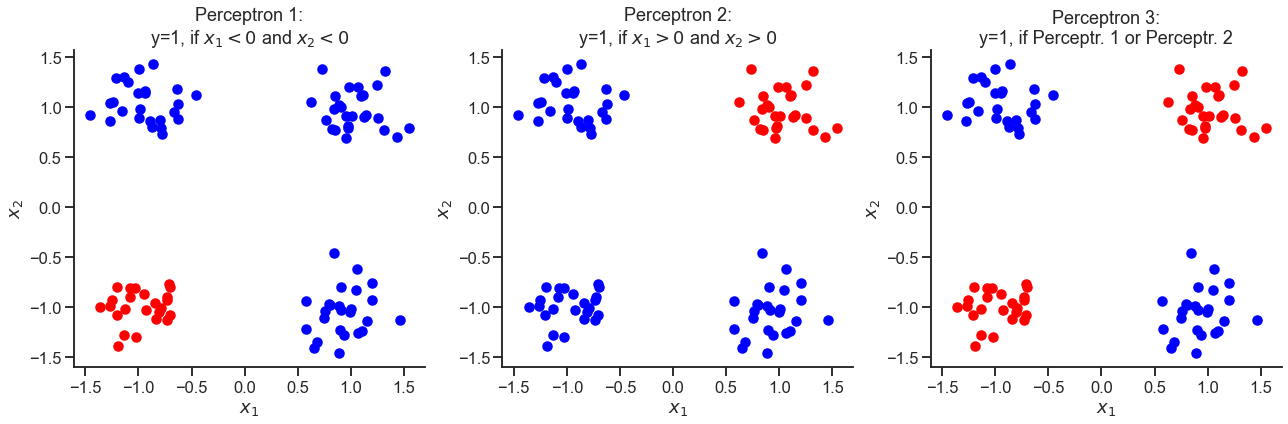

In [4]:
fig, axs = plt.subplots(1,3,figsize=(18,6))
axs[0].set_title('Perceptron 1:\n'+'y=1, if '+r'$x_1<0$'+' and '+r'$x_2<0$')
idx1 = np.logical_and(X[:,0]<0, X[:,1]<0)
axs[0].scatter(X[idx1,0], X[idx1,1], color='red')
axs[0].scatter(X[~idx1,0], X[~idx1,1], color='blue')

axs[1].set_title('Perceptron 2:\n'+'y=1, if '+r'$x_1>0$'+' and '+r'$x_2>0$')
idx2 = np.logical_and(X[:,0]>0, X[:,1]>0)
axs[1].scatter(X[idx2,0], X[idx2,1], color='red')
axs[1].scatter(X[~idx2,0], X[~idx2,1], color='blue')

axs[2].set_title('Perceptron 3:\n'+'y=1, if Perceptr. 1 or Perceptr. 2')
idx3 = np.logical_or(idx1, idx2)
axs[2].scatter(X[idx3,0], X[idx3,1], color='red')
axs[2].scatter(X[~idx3,0], X[~idx3,1], color='blue')

for ax in axs:
    despine(ax=ax)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
fig.tight_layout()

fig.savefig('figures/Figure-1-1_Multi-Perceptron-Classification.png', dpi=600)

In [5]:
y1 = idx1.astype(np.int)

np.random.seed(213)
p1 = Perceptron(n_in=2)
p1.train(X, y1)
p1_pred = p1.predict(X)
acc_p1 = np.mean((p1_pred>0.5) == y1)
print(acc_p1)
# standardize
p1_pred = (p1_pred - np.mean(p1_pred, axis=0)) / np.std(p1_pred, axis=0)

1.0


In [6]:
y2 = idx2.astype(np.int)

np.random.seed(4543)
p2 = Perceptron(n_in=2)
p2.train(X, y2)
p2_pred = p2.predict(X)
acc_p2 = np.mean((p2_pred>0.5) == y2)
print(acc_p2)
# standardize
p2_pred = (p2_pred - np.mean(p2_pred, axis=0)) / np.std(p2_pred, axis=0)

1.0


In [7]:
X3 = np.concatenate([p1_pred.reshape(-1,1), p2_pred.reshape(-1,1)], axis=1)
y3 = np.logical_or(y1==1, y2==1).astype(np.int)

np.random.seed(4719)
p3 = Perceptron(n_in=2)
p3.train(X3, y3, n_steps=10000, learning_rate=1)
p3_pred = p3.predict(X3)
acc_p3 = np.mean((p3_pred>0.5) == y3)
print(acc_p3)

1.0


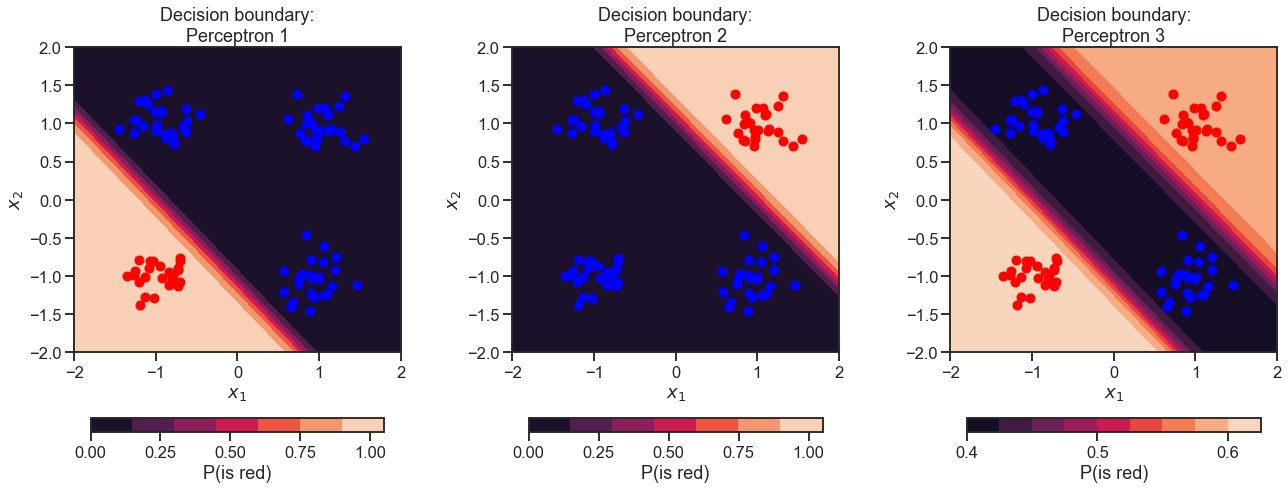

In [8]:
xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))

# predict with perceptron 1 & 2
zz1 = p1.predict(np.c_[xx.ravel(), yy.ravel()])
zz2 = p2.predict(np.c_[xx.ravel(), yy.ravel()])
# standardize
zz1_stand = (zz1 - np.mean(zz1, axis=0)) / np.std(zz1, axis=0)
zz2_stand = (zz2 - np.mean(zz2, axis=0)) / np.std(zz2, axis=0)
# predict with perceptron 3, based of prediction of perceptron 1 & 2
zz3 = p3.predict(np.c_[zz1_stand.ravel(), zz2_stand.ravel()])

fig, axs = plt.subplots(1, 3, figsize=(18,7))
for i, (y, zz) in enumerate(zip([y1, y2, y3], [zz1, zz2, zz3])):
    ax = axs[i]
    cs = ax.contourf(xx, yy, zz.reshape(xx.shape))
    cbar = fig.colorbar(cs, ax=ax, shrink=0.9, orientation="horizontal")
    cbar.set_label('P(is red)')
    if i < 2:
        cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
    else:
        cbar.set_ticks([0.4, 0.5, 0.6])
    for j in range(y.shape[0]):
        if y[j] == 0:
            marker = 'bo'
        else:
            marker = 'ro'
        ax.plot(X[j][0], X[j][1], marker)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_title('Decision boundary:\nPerceptron {}'.format(i+1))

fig.tight_layout(w_pad=4)
fig.savefig('figures/Figure-1-2_Multi-Perceptron-Decision-Boundaries.png', dpi=600)

# A neural network (ie. multi-layer perceptron)

# explain back-propagation

In [9]:
class sigmoid():
    def __init__(self):
        self.name = 'sigmoid'
        
    def forward(self, x):
        return 1./(1.+np.exp(-x))
    
    def derivative(self, a):
        return a*(1-a)
    
class softmax():
    def __init__(self):
        self.name = 'softmax'
        
    def forward(self, x):
        e_x = np.exp(x)
        return e_x / e_x.sum(axis=1, keepdims=True)
    
    def derivative(self, a):
        SM = a.reshape((-1,1))
        return (np.diagflat(a) - np.dot(SM, SM.T)).sum(axis=1)

class relu():
    def __init__(self):
        self.name = 'relu'
        
    def forward(self, x):
        return np.maximum(x, 0)
    
    def derivative(self, a):
        d = np.zeros_like(a)
        d[a<=0] = 0
        d[a>0] = 1
        return d
    
class tanh():
    def __init__(self):
        self.name = 'tanh'
        
    def forward(self, x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    
    def derivative(self, a):
        return 1-a**2

In [10]:
class NeuralNetwork:
            
    def __init__(self, n_in, n_out, n_hidden=[10], activations=None, seed=123):
        
        # init
        self.n_in = n_in
        self.n_out = n_out
        self.n_hidden = np.append(np.array(n_hidden), n_out).astype(np.int) # add output layer
        self.n_layers = self.n_hidden.size
        self.training_loss = []
        self.seed = seed
        self.parms = {}
            
        # initialize weights & biases
        np.random.seed(self.seed)
        n_in = int(self.n_in)
        for layer, n_out in enumerate(self.n_hidden):
            self.parms["W{}".format(layer)] = self._initialize_weight([n_in, n_out])
            self.parms["b{}".format(layer)] = self._initialize_weight([1, n_out])
            # also storage for neuron activations
            self.parms["A{}".format(layer)] = np.zeros((n_in, n_out)) 
            n_in = int(n_out)
        
        # set layer activations
        if activations is None:
            # if no activations are given, use sigmoid
            self.activations = [sigmoid()] * self.n_layers
        else:
            if len(activations) != self.n_layers:
                raise ValueError('/!\ Number of activations does not match number of layers.')
            self.activations = [a() for a in activations]
                       
    def _initialize_weight(self, size, bound=1):
        return np.random.uniform(-1, 1, size=size)
    
    def forward(self, X):
        self.parms['X'] = X
        for layer in range(self.n_layers):
            Z = X.dot(self.parms['W{}'.format(layer)]) + self.parms['b{}'.format(layer)]
            A = self.activations[layer].forward(Z)
            X = A
            self.parms["A{}".format(layer)] = A
        self.y_pred = A
        return A
        
    def predict(self, x):
        y_pred = self.forward(x)
        if self.n_out == 1:
            return np.array(y_pred > 0.5).astype(np.int).ravel()
        else:
            return np.argmax(y_pred, axis=1).ravel()
    
    def loss(self, x, y, zerotol=1e-10):
        """cross entropy loss"""
        if self.activations[-1].name not in ['sigmoid', 'softmax']:
            raise ValueError('loss function only valid for sigmoid or softmax output activations.')
        y_pred = self.forward(x)
        loss = -y * np.log(y_pred + zerotol) 
        loss -= (1 - y) * np.log(1 - y_pred + zerotol)
        return 1.0/x.shape[0] * np.sum(np.sum(loss, axis=1), axis=0) # average over samples
    
    def derivative_loss(self, x, y):
        """derivative of cross entropy loss"""
        if self.activations[-1].name not in ['sigmoid', 'softmax']:
            raise ValueError('derivative of loss only valid for sigmoid / softmax output activations.')
        y_pred = self.forward(x)
        return y_pred - y
        
    def backward(self, x, y, lam=1):
        y_pred = self.forward(x)
        self.training_loss.append(self.loss(x, y))
        dZ = self.derivative_loss(x, y)
        for layer in range(1, self.n_layers)[::-1]: # iterate hidden layers backward
            dW = 1.0/dZ.shape[0] * self.parms["A{}".format(layer-1)].T.dot(dZ)
            db = 1.0/dZ.shape[0] * np.sum(dZ, axis=0, keepdims=True)
            self.parms["W{}".format(layer)] -= self.lr * dW
            self.parms["b{}".format(layer)] -= self.lr * db
            dA = dZ.dot(self.parms["W{}".format(layer)].T)
            dZ = dA * self.activations[layer-1].derivative(self.parms["A{}".format(layer-1)])
        # input layer
        dW = 1.0/dZ.shape[0] * self.parms["X"].T.dot(dZ)
        db = 1.0/dZ.shape[0] * np.sum(dZ, axis=0, keepdims=True)
        self.parms["W0"] -= self.lr * dW
        self.parms["b0"] -= self.lr * db
            
    def fit(self, X, y, lr=0.1, n_steps=10000, batch_size=32, verbose=False):
        if verbose:
            print('Beginning training for {} batches ({} samples/batch):'.format(n_steps, batch_size))
        self.lr = lr
        iterator = range(n_steps)
        for step in (tqdm(iterator) if verbose else iterator):
            batch_i = np.random.choice(X.shape[0], batch_size, replace=False)
            self.forward(X[batch_i])
            self.backward(X[batch_i], y[batch_i])

## different activation functions

In [11]:
# this time we will use one output neuron for each of the two classes
# we therefore set n_out = 2 in our specification of the neural network

# by doing so, we also need to change the encoding of our target (y),
# so that it has one value for each of the two output neurons
# this type of encoding is called one-hot encoding and looks like this:
# if class 1: [1, 0], if class 2: [0, 1]; thereby y.argmax(axis=1) will result in our original y

# we will also use a softmax output function, as the two classes
# are mutually exclusive

y_onehot = np.zeros((y.size, 2))
y_onehot[np.arange(y.size), y.ravel()] = 1
print('This is how one-hot encoding looks like for the two classes:')
print(y_onehot[n_samples-1:n_samples+1])
print('\nDimension: {}x{}'.format(*y_onehot.shape))

This is how one-hot encoding looks like for the two classes:
[[1. 0.]
 [0. 1.]]

Dimension: 100x2


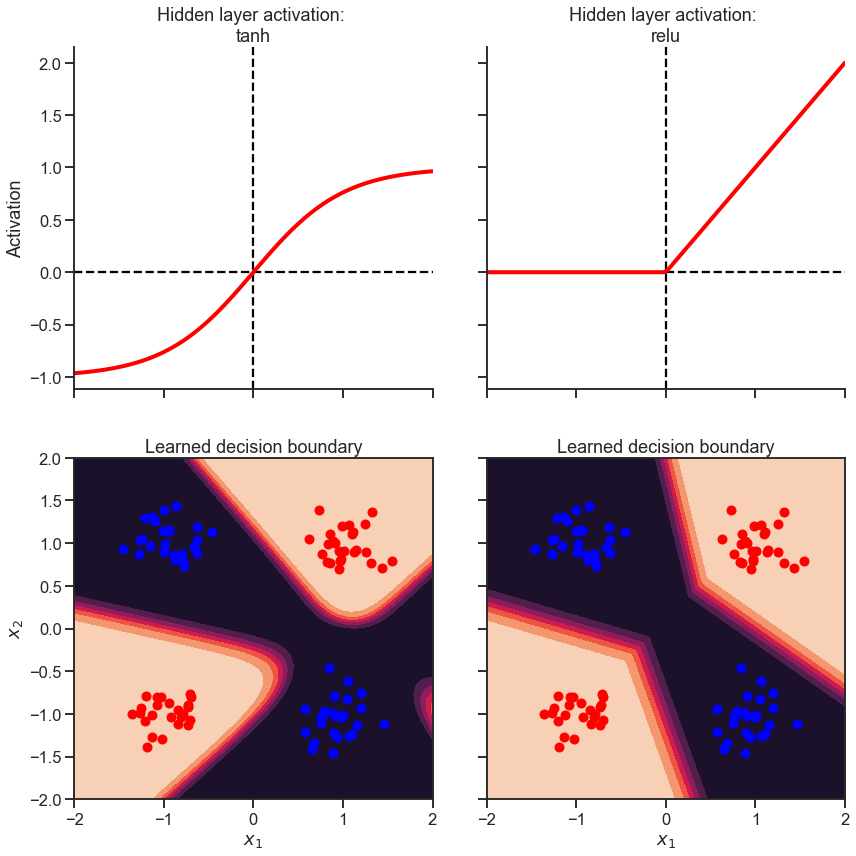

In [12]:
seed = 159
np.random.seed(seed)

fig, axs = plt.subplots(2,2,figsize=(12,12), sharey='row', sharex=True)
for i, act in enumerate([tanh, relu]):
    
    # plot activation function of hidden layer
    ax = axs[0,i]
    x = np.linspace(-2,2,100)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.plot(x, act().forward(x), color='red', lw=4)
    ax.set_title('Hidden layer activation: \n{}'.format(act().name))
    despine(ax=ax)
    
    # make and fit neural network
    nn = NeuralNetwork(n_in=2, n_out=2, n_hidden=[3], activations=[act, softmax], seed=seed)
    nn.fit(X, y_onehot, verbose=False)
    
    # perdict probabilities
    zz = nn.forward(np.c_[xx.ravel(), yy.ravel()])
    zz = zz[:,1].reshape(xx.shape)
    
    # plot decision boundary
    ax = axs[1,i]
    cs = ax.contourf(xx,yy,zz)
    for i in range(y.shape[0]):
        if y[i] == 0:
            marker = 'bo'
        else:
            marker = 'ro'
        ax.plot(X[i][0], X[i][1], marker)
    ax.set_title('Learned decision boundary')
    ax.set_xlabel(r'$x_1$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

# some final plotting settings
axs[0,0].set_ylabel('Activation')
axs[1,0].set_ylabel(r'$x_2$')
fig.tight_layout(h_pad=4, w_pad=4)

# Example 3: Breast cancer classification

In [33]:
data = load_breast_cancer()

In [34]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [35]:
data['data'].shape

(569, 30)

In [36]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [45]:
# lets subset to 6 informative features
feature_subset = ['mean area', 'mean concavity', 'mean concave points',
                  'area error', 'worst area', 'worst concave points']

In [46]:
df = pd.DataFrame(data['data'][:,np.isin(data['feature_names'], feature_subset)])
df.columns = feature_subset
df['target'] = data['target_names'][data['target']]
df.head()

,mean area,mean concavity,mean concave points,area error,worst area,worst concave points,target
0,1001.0,0.3001,0.14710,153.40,2019.0,0.2654,malignant
1,1326.0,0.0869,0.07017,74.08,1956.0,0.1860,malignant
2,1203.0,0.1974,0.12790,94.03,1709.0,0.2430,malignant
3,386.1,0.2414,0.10520,27.23,567.7,0.2575,malignant
4,1297.0,0.1980,0.10430,94.44,1575.0,0.1625,malignant


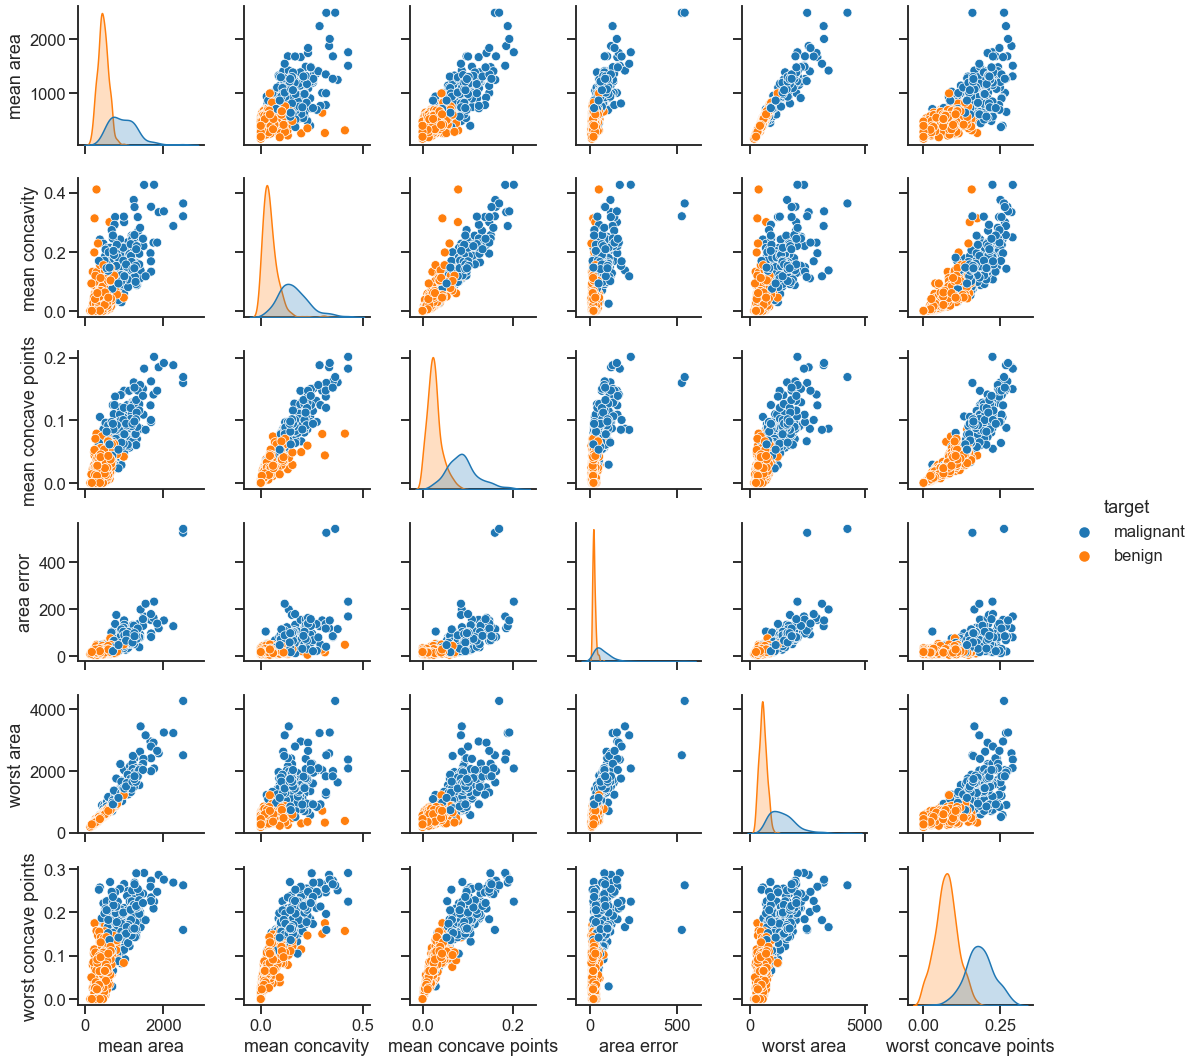

In [47]:
sns.pairplot(df, hue='target')

In [ ]:
assert False

In [56]:
X = df[feature_subset].values
y = data['target']
y_onehot = np.zeros((y.size, 2))
y_onehot[np.arange(y.size), y] = 1

In [57]:
# standardize
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [58]:
# train / test split
train_idx = np.random.choice(X.shape[0], int(0.7 * X.shape[0]), replace=False)
test_idx = np.array([i for i in np.arange(X.shape[0]) if i not in train_idx])

In [87]:
np.random.seed(2130)
nn = NeuralNetwork(n_in=X.shape[1], n_out=1, n_hidden=[10])
nn.fit(X[train_idx], y[train_idx].reshape(-1,1), verbose=True)

 10%|█         | 1020/10000 [00:00<00:01, 4802.03it/s]

Beginning training for 10000 batches (32 samples/batch):


100%|██████████| 10000/10000 [00:01<00:00, 5986.73it/s]


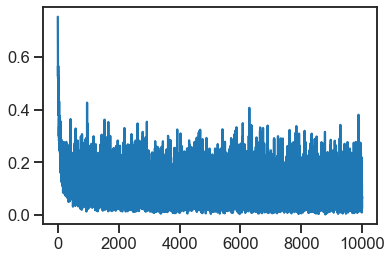

In [88]:
plt.plot(nn.training_loss)

In [89]:
# prediction accuracy in training data
y_pred = nn.predict(X[train_idx])
np.mean(y_pred == y[train_idx])

0.9673366834170855

In [90]:
# prediction accuracy in test data
y_pred = nn.predict(X[test_idx])
np.mean(y_pred == y[test_idx])

0.9473684210526315